In [3]:
import sys
from os import path
code_path = path.abspath(path.join('../../diss3_code/signal'))
print(code_path, path.exists(code_path))
sys.path.append(code_path)

/home/siegman/Documents/Shahar/BarIlan/Dissertation3/code/diss3_code/signal True


In [5]:
import smooth_component_analysis as sca
from importlib import reload
reload(sca)
import numpy as np
import pandas as pd
import get_db_data as gdd

from scipy.stats import zscore
import matplotlib.pyplot as plt

import seaborn as sns


In [6]:
A_groups = [1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
                          1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051]

B_groups = [1014, 1016, 1019, 1020, 1022,   1025, 1026, 1027, 1029, 1030]

In [7]:
sago = sca.savitzky_golay(A_groups, 21,11,4,3)

In [8]:
df= sago.get_aligned_signal_componets()

TypeError: unsupported operand type(s) for -: 'float' and 'function'

In [60]:
sago_b = sca.savitzky_golay(B_groups, 21, 11, 4, 3)

In [61]:
df_b = sago_b.get_aligned_signal_componets()

x range: 4.0 237.0


In [5]:
class triad:
    def __init__(self, df, group, signal_type):
        cols = [c for c in df.columns if c[0]==group and c[1].startswith(signal_type)]
        #print(cols)
        cosine_simi = np.corrcoef(df[cols].values.T)
        angular_dist = np.arccos(cosine_simi)/np.pi
        self.corrs = sorted([angular_dist[0,1], angular_dist[1,2], angular_dist[2,0]])
        
        self._triangle_vertices()
    
    def _triangle_vertices(self):
        corrs = self.corrs
        a,b,c = corrs[1], corrs[2], corrs[0]
        cos_alpha = (b**2 + c**2 - a**2)/(2*b*c)
        if cos_alpha > 1:
            print(corrs)
            raise ValueError("Triangle vertices encountered miscalculation")
        sin_alpha = np.sqrt(1-cos_alpha**2)
        A = np.zeros(2)
        C = np.array((b*cos_alpha, b*sin_alpha))
        B = np.array((c,0))
        self.vertices = np.vstack([A,B,C,A])
    
    @property
    def point(self):
        return np.array([ self.corrs[0], (self.corrs[1]+self.corrs[2])/2 ])
    
    @property
    def triangle(self):
        return self.vertices
    
    def to_triangle(self, plt=False):
        if plt:
            return self.vertices[:,0], self.vertices[:,1]
        return self.vertices
    
    @property
    def triangle_ratio(self):
        p = self.point
        return p[1]/p[0]

In [7]:
tr = {gr: triad(df, gr, 'Sg_') for gr in A_groups}

In [63]:
for gr in B_groups:
    tr[gr] = triad(df_b, gr, 'Sg_')

In [62]:
from collections import Counter
Counter([c[0] for c in df_b.columns if c[1].startswith('Sg_')])

Counter({1014: 3,
         1016: 3,
         1019: 3,
         1020: 3,
         1022: 3,
         1025: 3,
         1026: 3,
         1027: 3,
         1029: 3,
         1030: 3})

In [64]:
pts = np.vstack([v.point for v in tr.values()])
pts

array([[0.25587108, 0.51814235],
       [0.43251305, 0.47516835],
       [0.39430119, 0.5591842 ],
       [0.26652714, 0.37108351],
       [0.38516274, 0.4340664 ],
       [0.36420722, 0.54141443],
       [0.21522179, 0.48610614],
       [0.28189081, 0.31130936],
       [0.38896783, 0.48798327],
       [0.40866329, 0.54387469],
       [0.51345914, 0.52427149],
       [0.39934138, 0.55955122],
       [0.35015298, 0.41322429],
       [0.46522058, 0.61260613],
       [0.37582385, 0.43007061],
       [0.35498399, 0.54855905],
       [0.40147641, 0.4532218 ],
       [0.31426453, 0.53478886],
       [0.25258851, 0.33586262],
       [0.3175788 , 0.56550353],
       [0.43782914, 0.5187156 ],
       [0.49298462, 0.59295322],
       [0.2881445 , 0.42054455],
       [0.27583346, 0.56134359],
       [0.35636157, 0.41486245],
       [0.32948051, 0.49741534],
       [0.32582783, 0.38720275],
       [0.203579  , 0.42981338],
       [0.44152581, 0.5023    ],
       [0.34069809, 0.56704522]])

In [65]:
rats = [v.triangle_ratio for v in tr.values()]

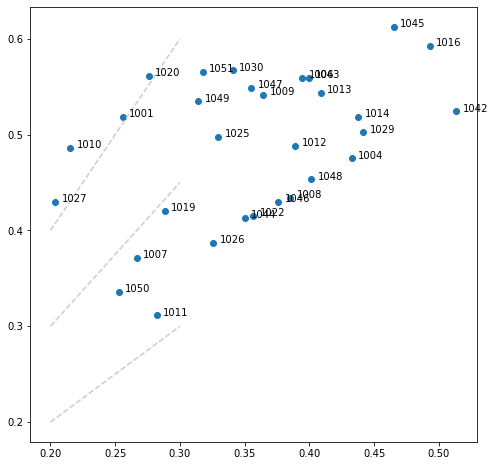

In [68]:
plt.figure(figsize=(8,8))
plt.scatter(pts[:,0], pts[:,1])
plt.plot([0.2, 0.3], [0.2, 0.3],'--',color=[0.8]*3)
plt.plot([0.2, 0.3], [0.3, 0.45],'--',color=[0.8]*3)
plt.plot([0.2, 0.3], [0.4, 0.6],'--',color=[0.8]*3)
for gr, p in zip(A_groups+B_groups, pts):
    plt.text(p[0]+0.005, p[1], str(gr))

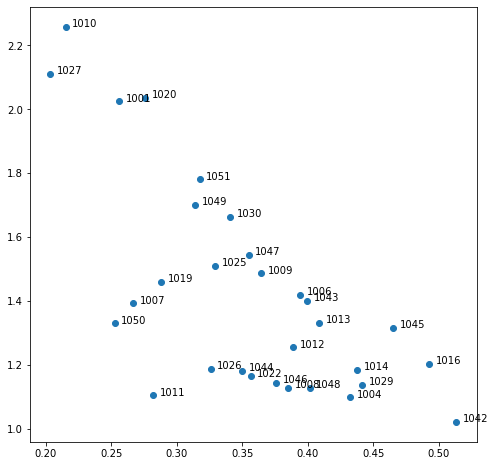

In [70]:
plt.figure(figsize=(8,8))

plt.scatter(pts[:,0],rats)
#for gr, p, r in zip(A_groups, pts, rats):
#    plt.text(p[0]+0.005, r, str(gr))

for gr, p,r  in zip(A_groups+B_groups, pts, rats):
    plt.text(p[0]+0.005, r, str(gr))

In [71]:
np.arccos(1
         )

0.0

In [73]:
np.cos(0.2*np.pi)

0.8090169943749475

In [82]:
[c for c in df_b.columns if c[0]==1027]

[(1027, 'Raw_179'),
 (1027, 'Sg_179'),
 (1027, 'resid_179'),
 (1027, 'rms_179'),
 (1027, 'rmso_179'),
 (1027, 'Raw_180'),
 (1027, 'Sg_180'),
 (1027, 'resid_180'),
 (1027, 'rms_180'),
 (1027, 'rmso_180'),
 (1027, 'Raw_181'),
 (1027, 'Sg_181'),
 (1027, 'resid_181'),
 (1027, 'rms_181'),
 (1027, 'rmso_181')]

In [84]:
df_b[[(1027,'Sg_179'),(1027,'Sg_180'),(1027,'Sg_181')]].corr()

1027                    
               Sg_179    Sg_180    Sg_181
1027 Sg_179  1.000000  0.192044  0.245224
     Sg_180  0.192044  1.000000  0.802357
     Sg_181  0.245224  0.802357  1.000000

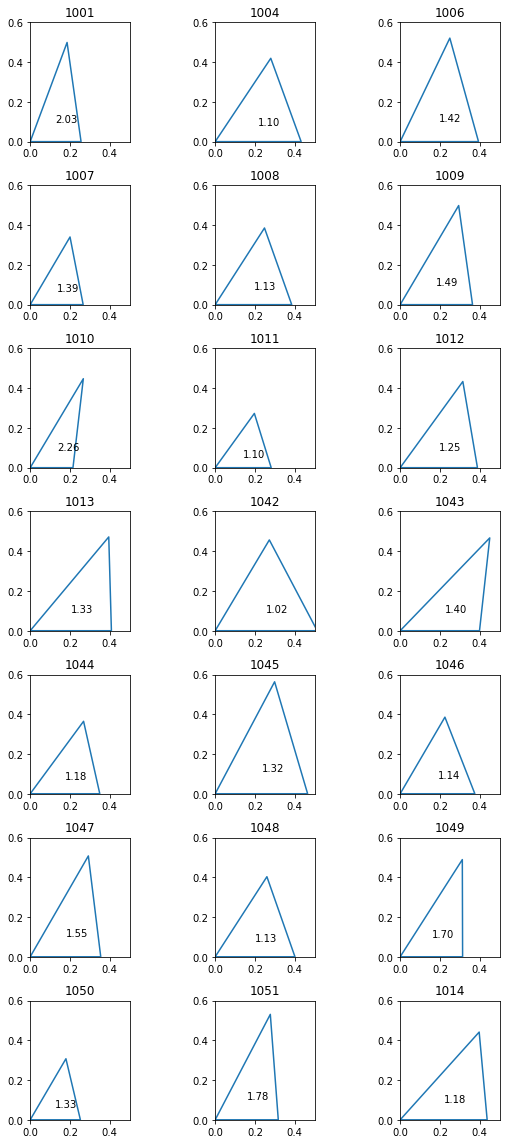

In [100]:
plt.subplots(7,3, figsize=(8,16))

for i,(grp, t) in enumerate(tr.items()):
    ax = plt.subplot(7,3,i+1)
    points = t.to_triangle(True)
    plt.plot(*points)
    ax.set_aspect('equal')
    ax.set_xlim(0,0.5)
    ax.set_ylim(0,0.6)
    plt.title("{}".format(grp))
    plt.text(points[0].max()/2, points[1].max()*0.2,"{:.2f}".format(t.triangle_ratio))
    if i==20:
        break
        
plt.tight_layout()